In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import LabelEncoder

import nltk
from nltk.tokenize import word_tokenize , sent_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import string

from wordcloud import WordCloud

from sklearn.naive_bayes import BernoulliNB , MultinomialNB , GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier , ExtraTreesClassifier
from sklearn.model_selection import train_test_split


from sklearn.metrics import confusion_matrix , accuracy_score , precision_score

In [145]:
df = pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv",encoding = "latin")

In [146]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [147]:
df.shape

(5572, 5)

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [149]:
df.drop(columns =['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [150]:
df.sample(5)

,v1,v2
2761,ham,I am not sure about night menu. . . I know onl...
419,spam,Send a logo 2 ur lover - 2 names joined by a h...
1545,ham,"Good afternoon, my love ! Any job prospects ? ..."
3987,ham,Hello. Sort of out in town already. That . So ...
5219,ham,Pls she needs to dat slowly or she will vomit ...


In [151]:
df.rename(columns = {"v1" : "target" , "v2" : "message"},inplace = True)

In [152]:
df.sample(5)

,target,message
2848,spam,YOUR CHANCE TO BE ON A REALITY FANTASY SHOW ca...
5114,ham,Argh why the fuck is nobody in town ;_;
320,ham,"Merry Christmas to you too babe, i love ya *ki..."
4297,spam,WELL DONE! Your 4* Costa Del Sol Holiday or å£...
117,ham,Goodo! Yes we must speak friday - egg-potato r...


In [153]:
encoder = LabelEncoder()

df["target"] = encoder.fit_transform(df["target"])

In [154]:
df.sample(5)

,target,message
132,0,First answer my question.
5445,0,"And that's fine, I got enough bud to last most..."
1879,1,U have a secret admirer who is looking 2 make ...
4110,1,URGENT! Your Mobile number has been awarded a ...
425,0,Ok. She'll be ok. I guess


In [155]:
df.isnull().sum()

target     0
message    0
dtype: int64

In [156]:
df.duplicated().sum()

403

In [157]:
df = df.drop_duplicates(keep="first")

In [158]:
df.duplicated().sum()

0

In [159]:
df.shape


(5169, 2)

In [160]:
df["target"].value_counts()

0    4516
1     653
Name: target, dtype: int64

# **Exploratory Data Analysis**

In [161]:
df["target"].value_counts()

0    4516
1     653
Name: target, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='target', ylabel='count'>

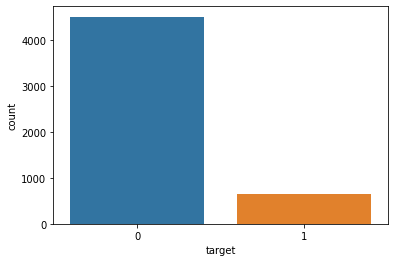

In [162]:
sns.countplot(df["target"])

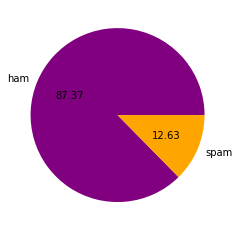

In [163]:
plt.pie(df.target.value_counts(),labels = ["ham","spam"] ,colors = ["purple","orange"], autopct = "%0.2f")
plt.show()

In [164]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [165]:
df["num_char"] = df["message"].apply(len)

In [166]:
df["num_word"] = df["message"].apply(lambda x : len(word_tokenize(x)))

In [167]:
df["num_sent"] = df["message"].apply(lambda x : len(sent_tokenize(x)))

In [168]:
df.head()

,target,message,num_char,num_word,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [169]:
df[["num_char","num_word","num_sent"]][df["target"]==0].describe()

,num_char,num_word,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [170]:
df[df["target"]==1][["num_char","num_word","num_sent"]].describe()

,num_char,num_word,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


<AxesSubplot:xlabel='num_char', ylabel='Count'>

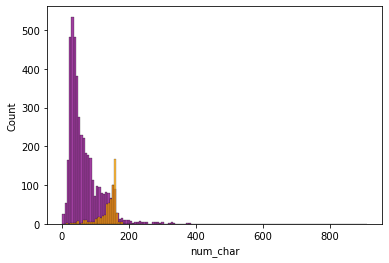

In [171]:
sns.histplot(df["num_char"][df.target == 0],color = "purple")
sns.histplot(df["num_char"][df.target == 1],color = "orange")

<AxesSubplot:xlabel='num_word', ylabel='Count'>

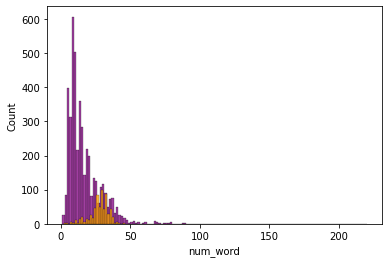

In [172]:
sns.histplot(df["num_word"][df.target == 0],color = "purple")
sns.histplot(df["num_word"][df.target == 1],color = "orange")

<AxesSubplot:xlabel='num_sent', ylabel='Count'>

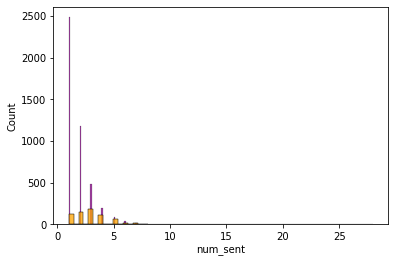

In [173]:
sns.histplot(df["num_sent"][df.target == 0],color = "purple")
sns.histplot(df["num_sent"][df.target == 1],color = "orange")

# **Data Processing**

In [174]:
ps = PorterStemmer()


In [175]:
def transform(txt):
    txt = txt.lower()
    
    txt = word_tokenize(txt)
    
    y = []
    
    for i in txt:
        if i.isalnum() and i not in stopwords.words('english') and i not in string.punctuation:
            y.append(ps.stem(i))
            
    return " ".join(y)

In [176]:
transform("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")


'gon na home soon want talk stuff anymor tonight k cri enough today'

In [177]:
df["transformed_text"] = df["message"].apply(transform)

In [178]:
df.head()

,target,message,num_char,num_word,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [179]:
cloud = WordCloud(width = 800,height = 600 , background_color = "black")

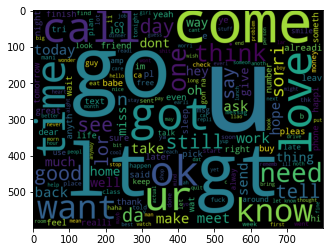

In [180]:
ham_cloud = cloud.generate(df["transformed_text"][df["target"] == 0].str.cat(sep=" "))
plt.imshow(cloud)

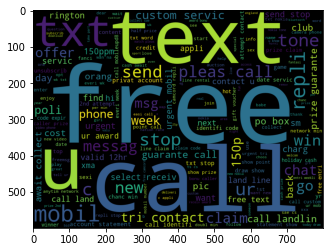

In [181]:
spam_cloud = cloud.generate(df["transformed_text"][df["target"] == 1].str.cat(sep=" "))
plt.imshow(cloud)

# **Model Building**

In [182]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()

In [183]:
x = tf.fit_transform(df["transformed_text"]).toarray()
x.shape

(5169, 6708)

In [184]:
y = df["target"].values

In [185]:
x_train , x_test ,y_train ,y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)

In [186]:
bn = BernoulliNB()
mn = MultinomialNB()
gb = GaussianNB()
dt = DecisionTreeClassifier()
kn = KNeighborsClassifier()
rf = RandomForestClassifier()
ex = ExtraTreesClassifier()

In [187]:
bn.fit(x_train , y_train)
pred = bn.predict(x_test)
accuracy_score(y_test,pred)

0.9700193423597679

In [188]:
classes = {
    "BernoulliNB" : bn,
    "MultinomialNB" : mn,
    "GaussianNB" : gb,
    "DecisionTreeClassifier" : dt,
    "KNeighborsClassifier" : kn,
    "RandomForestClassifier" : rf,
    "ExtraTreesClassifier" : ex
}

In [189]:
classes.items()

dict_items([('BernoulliNB', BernoulliNB()), ('MultinomialNB', MultinomialNB()), ('GaussianNB', GaussianNB()), ('DecisionTreeClassifier', DecisionTreeClassifier()), ('KNeighborsClassifier', KNeighborsClassifier()), ('RandomForestClassifier', RandomForestClassifier()), ('ExtraTreesClassifier', ExtraTreesClassifier())])

In [190]:
def scores(xtrain,ytrain,xtest,ytest,clf):
    
    clf.fit(xtrain,ytrain)
    clf.predict(xtest)
    
    return accuracy_score(ytest,clf.predict(xtest)) , precision_score(ytest,clf.predict(xtest))

In [191]:
precision = []

accuracy = []

for name , cla in classes.items():
    acc , prec = scores(x_train,y_train,x_test,y_test,cla)
    accuracy.append(acc)
    precision.append(prec)
    
print(accuracy)

    
    


[0.9700193423597679, 0.9593810444874274, 0.8762088974854932, 0.9555125725338491, 0.9003868471953579, 0.9748549323017408, 0.9758220502901354]


In [192]:
df_val = pd.DataFrame({"Name":classes.keys(),"Accuracy":accuracy,"Precision":precision}).sort_values("Precision",ascending=False)

In [193]:
df_val

,Name,Accuracy,Precision
1,MultinomialNB,0.959381,1.000000
4,KNeighborsClassifier,0.900387,1.000000
5,RandomForestClassifier,0.974855,0.991228
6,ExtraTreesClassifier,0.975822,0.974790
0,BernoulliNB,0.970019,0.973451
3,DecisionTreeClassifier,0.955513,0.848485
2,GaussianNB,0.876209,0.523148


In [194]:
!pip install gradio

In [195]:
import gradio as gr

In [196]:
def prediction(Input):
    txt = transform(Input)
    idf = tf.transform([txt])
    val = mn.predict(idf)[0]
    
    if(val == 1):
        return "Spam"
    else:
        return "Ham"
    

In [197]:
interface = gr.Interface(fn = prediction , inputs = "text" , outputs = "text")

In [198]:
interface.launch(share=True)

Running on local URL:  http://127.0.0.1:7865
Running on public URL: https://5d932716d007914f.gradio.app

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
